In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("haberman.csv")

In [3]:
Data.head(2)

,Age,Operation_Year,Axil_Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1


In [4]:
Data.columns

Index(['Age', 'Operation_Year', 'Axil_Nodes', 'Survival Status'], dtype='object')

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_Year   306 non-null    int64
 2   Axil_Nodes       306 non-null    int64
 3   Survival Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
Data.describe()

,Age,Operation_Year,Axil_Nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
Data.isnull().sum()

Age                0
Operation_Year     0
Axil_Nodes         0
Survival Status    0
dtype: int64

In [8]:
Data.duplicated().sum()

17

In [9]:
Data.drop_duplicates(inplace = True)

In [10]:
Data.duplicated().sum()

0

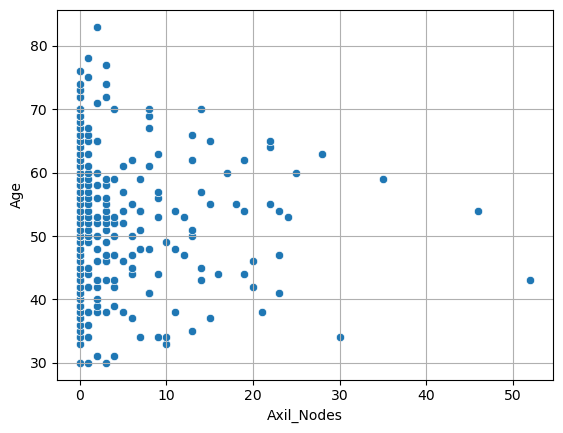

In [11]:
#Data.plot(kind='scatter', x='Axil_Nodes', y='Age') 
sns.scatterplot(data = Data,x ="Axil_Nodes", y = "Age")
plt.grid()
plt.show()

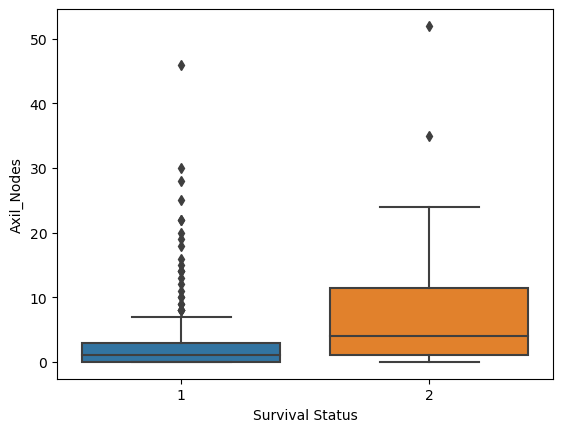

In [12]:
sns.boxplot(x="Survival Status",y="Axil_Nodes", data=Data)
plt.show()

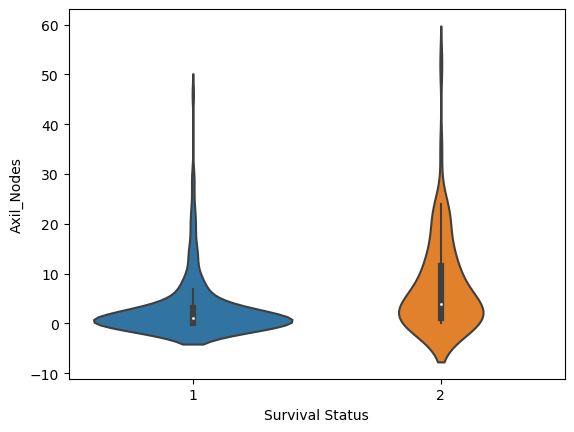

In [13]:
sns.violinplot(x="Survival Status", y="Axil_Nodes",data=Data)
plt.legend
plt.show()

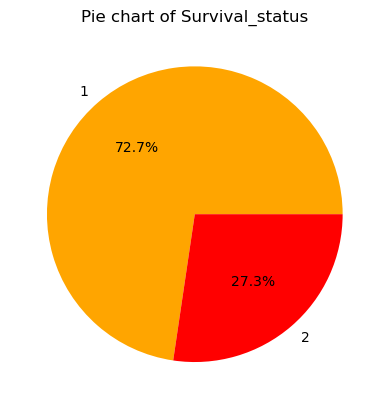

In [14]:
status_counts = Data["Survival Status"].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['orange', 'red'])
plt.title("Pie chart of Survival_status")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


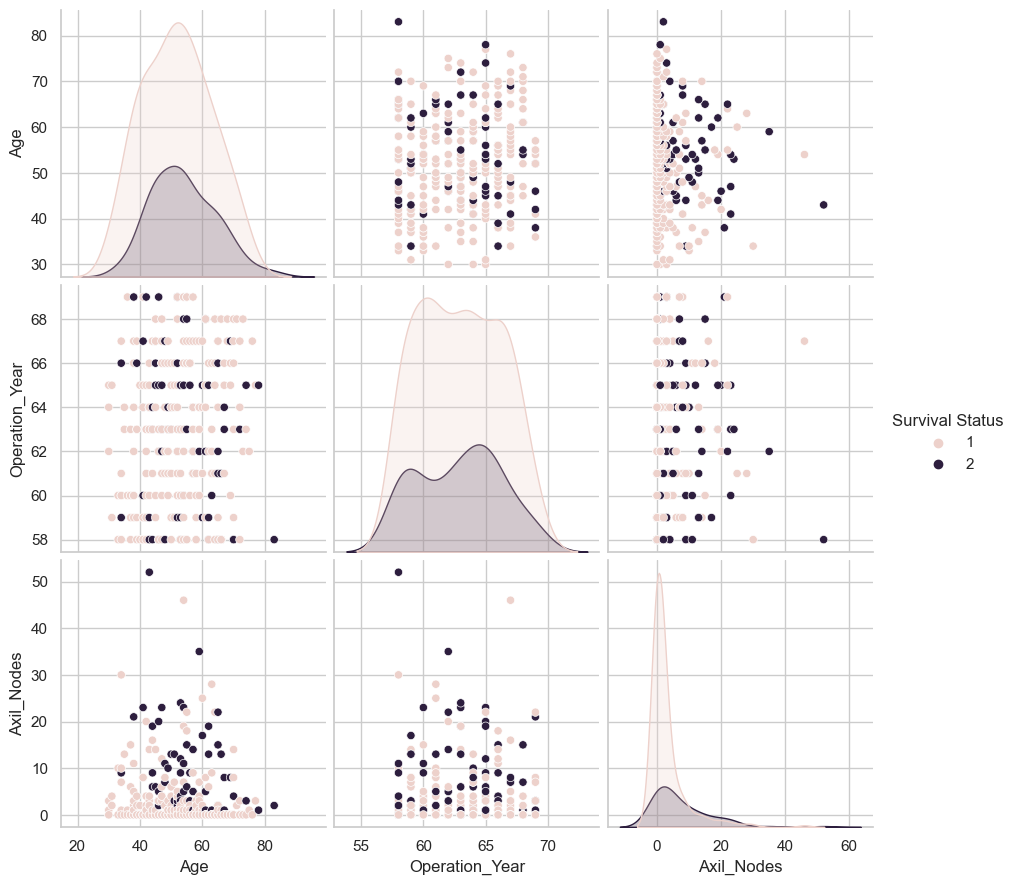

In [15]:
sns.set(style='whitegrid')
sns.pairplot(Data, hue='Survival Status', height=3, vars=['Age', 'Operation_Year', 'Axil_Nodes'])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Assuming 'Survival Status'
X = Data.drop('Survival Status', axis=1)  
y = Data['Survival Status']

In [18]:
# Perform train-test split concept like 80% training, 20% testing)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state = 42)

In [19]:
# Print the shapes 

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (231, 3) (231,)
Testing set shape: (58, 3) (58,)


In [20]:
y_train.value_counts()

Survival Status
1    168
2     63
Name: count, dtype: int64

In [21]:
y_test.value_counts()

Survival Status
1    42
2    16
Name: count, dtype: int64

In [22]:
max_val = X_train.loc[:, ['Age', 'Operation_Year','Axil_Nodes']].max()
min_val = X_train.loc[:, ['Age', 'Operation_Year','Axil_Nodes']].min()

train_num_feat = ((X_train.loc[:, ['Age', 'Operation_Year','Axil_Nodes']] - min_val)/(max_val - min_val)).values
test_num_feat = ((X_test.loc[:, ['Age', 'Operation_Year','Axil_Nodes']] - min_val)/(max_val - min_val)).values

In [24]:
print(round(train_num_feat.mean(), 2))
print(round(test_num_feat.mean(), 2))

0.32
0.31


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


max_accuracy = 0
best_k = 0
results = []

for i in range(1, 11):
    knn_cv = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto', leaf_size=30, p=2)
    cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
    mean_score = sum(cv_scores) / len(cv_scores)
    results.append((i, mean_score))
    
   
    if mean_score > max_accuracy:
        max_accuracy = mean_score
        best_k = i


for result in results:
    print(result)


print("\n\033[1;94mThe max accuracy is {:.4f} for k = {}\033[0m".format(max_accuracy, best_k))


(1, 0.6706753006475485)
(2, 0.696854764107308)
(3, 0.6925069380203516)
(4, 0.718686401480111)
(5, 0.7317298797409805)
(6, 0.7360777058279371)
(7, 0.7403330249768733)
(8, 0.7272895467160037)
(9, 0.7447733580018502)
(10, 0.7403330249768734)

The max accuracy is 0.7448 for k = 9


In [35]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
accuracy_score(y_test.values, knn.predict(X_test))

0.7931034482758621

In [27]:
knn = KNeighborsClassifier(n_neighbors=9)  # Example, use your chosen parameters
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_prediction)
report = classification_report(y_test, y_prediction)

print("\033[1;34mAccuracy: {:.2f}\033[0m".format(accuracy))  
print("\033[1;34mClassification Report:\n{}\033[0m".format(report))

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.95      0.87        42
           2       0.75      0.38      0.50        16

    accuracy                           0.79        58
   macro avg       0.78      0.66      0.68        58
weighted avg       0.79      0.79      0.77        58

